In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
from concurrent.futures import ThreadPoolExecutor
import os
import glob
import re
from tqdm import tqdm
import imageio
import pickle
import matplotlib.animation as animation



load_root=False
load_backup=True

In [13]:
if load_root:
    print('load from root')
    files=glob.glob("../data_root/*root")
    sorted_files = sorted(files, key=lambda x: int(re.search(r'\d+', x).group()))
    
    
    
    dump=[]
    labels=[]
    for file in sorted_files:
        labels.append(file)
        workers=8

        decompression_executor = ThreadPoolExecutor(max_workers=workers)
        interpretation_executor = ThreadPoolExecutor(max_workers=workers)


        with uproot.open(file) as file:
            tree = file['B4;1']
            braunches=['Edep']
            dump.append(tree.arrays( braunches,library="np", 
                decompression_executor=decompression_executor, 
                interpretation_executor=interpretation_executor)['Edep'])
if load_backup:
    with open('run_1_float.pkl','rb') as f:
        dump=pickle.load(f)
    labels=np.arange(len(dump))

In [15]:
# num=0

# for i,j in tqdm(zip(dump,labels)):
    
    
#     plt.figure(figsize=(10,5))
#     plt.grid(True)
#     plt.hist(i,bins=np.linspace(0,700,700),label=j)
#     plt.legend()
    
#     plt.yscale('log')
#     plt.ylim(1,5.e3)
#     plt.savefig('../../images/{}.png'.format(num))
#     plt.close()
#     num=num+1

102it [01:47,  1.01s/it]/tmp/ipykernel_9044/1343264511.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('../../images/{}.png'.format(num))
200it [03:32,  1.06s/it]


In [24]:
# files=glob.glob("../../images/*.png")


# sorted_files = sorted(files, key=lambda x: int(re.search(r'\d+', x).group()))
# print(sorted_files)

# with imageio.get_writer('animated_plot.gif', mode='I', duration=0.5) as writer:
#     for filename in tqdm(sorted_files):
#         image = imageio.imread(filename)
#         writer.append_data(image)

['../../images/0.png', '../../images/1.png', '../../images/2.png', '../../images/3.png', '../../images/4.png', '../../images/5.png', '../../images/6.png', '../../images/7.png', '../../images/8.png', '../../images/9.png', '../../images/10.png', '../../images/11.png', '../../images/12.png', '../../images/13.png', '../../images/14.png', '../../images/15.png', '../../images/16.png', '../../images/17.png', '../../images/18.png', '../../images/19.png', '../../images/20.png', '../../images/21.png', '../../images/22.png', '../../images/23.png', '../../images/24.png', '../../images/25.png', '../../images/26.png', '../../images/27.png', '../../images/28.png', '../../images/29.png', '../../images/30.png', '../../images/31.png', '../../images/32.png', '../../images/33.png', '../../images/34.png', '../../images/35.png', '../../images/36.png', '../../images/37.png', '../../images/38.png', '../../images/39.png', '../../images/40.png', '../../images/41.png', '../../images/42.png', '../../images/43.png

  0%|                                                                                                                               | 0/200 [00:00<?, ?it/s]/tmp/ipykernel_9044/1446539109.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 146.97it/s]


In [43]:
counts=[]
for i in dump:
    counts.append(np.histogram(i,bins=[660,665])[0])
    
    
counts_1=[]

for i in dump:
    counts_1.append(len(i))

(0.0, 12137.3)

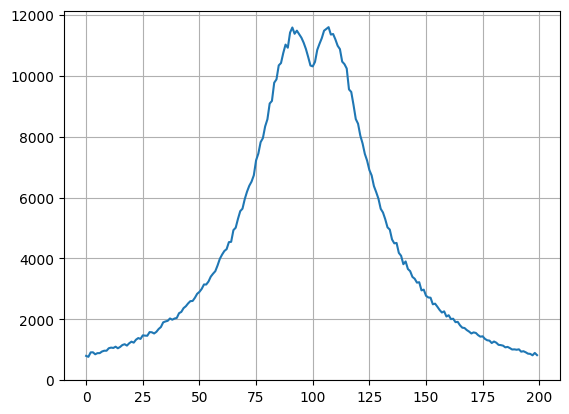

In [44]:
plt.plot(counts)
plt.grid(True)
plt.ylim(bottom=0) 

(0.0, 61541.95)

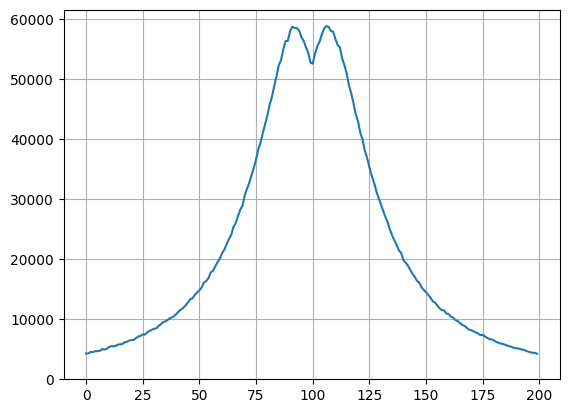

In [45]:
plt.plot(counts_1)
plt.grid(True)
plt.ylim(bottom=0) 

In [46]:
dist=np.linspace(-4,4,200)
h=1

alpha=np.arctan(dist/h)
l1=37.8

l2=7.56

max_alpha=np.arctan(l2/l1)
#μ_NaI = 0.03 # mm-1,
μ_NaI = 0.02782 
comp1= (l1*abs(np.sin(alpha))+l2*abs(np.sin(np.pi/2-alpha)))*l2 / (np.pi*4*(dist**2+h**2)*1e6)



sin_list=abs(np.sin(alpha))
             

sin_list[sin_list<=np.sin(max_alpha)]=np.sin(max_alpha)

dist_d=(l2/sin_list)

#comp3=1-np.exp(-μ_NaI*dist_d)

μ_air=0.924e-5
#μ_air=1.5e-5
#μ_air=2.51359E-05
comp4=np.exp(-μ_air*np.sqrt(dist**2+h**2)*1000)

In [47]:
def calculate_mu_angle(ang,step):
    N=100000
    a=np.random.rand(N)
    b=np.random.rand(N)
    points=np.vstack((a,b)).T


    points_ractangle=np.zeros_like(points)
    points_ractangle[:,0]=points[:,0]*l2
    points_ractangle[:,1]=points[:,1]*l1


    #ax = plt.gca()
    #ax.set_aspect('equal', adjustable='box')

    #plt.scatter(points_ractangle[:,0],points_ractangle[:,1],s=0.1)


    #ang=np.pi/16

    R=np.array([[np.cos(ang),-np.sin(ang)],
      [np.sin(ang),np.cos(ang)]])


    points_rac_rot=np.dot(R,points_ractangle.T).T





    xmin=np.min(points_rac_rot[:,0])
    xmax=np.max(points_rac_rot[:,0])
    step=l2/40

    steps=np.arange(xmin,xmax,step)
    
    area=len(steps)
    bounds=np.vstack((steps[:-1],steps[1:])).T

    points_b_count=[]
    for i in bounds:
        points_b_count.append(np.count_nonzero(np.logical_and(points_rac_rot[:,0]>i[0],points_rac_rot[:,0]<i[1])))
    points_b_count=np.array(points_b_count)
    S_g=l1*l2
    density=N/S_g
    S=points_b_count/density
    d=S/step
    return(d,area)


# plt.scatter(points_rac_rot[:,0],points_rac_rot[:,1],s=0.1)
# ax = plt.gca()
# ax.set_aspect('equal', adjustable='box')

In [48]:
step=l2/40

comp5=[]
for i in tqdm(alpha):
    d,_=calculate_mu_angle(i,step)

    loacal_m = 1-np.exp(-μ_NaI*d)
    comp5.append(np.average(loacal_m))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:04<00:00, 43.94it/s]


(0.0, 3.529254311072705e-06)

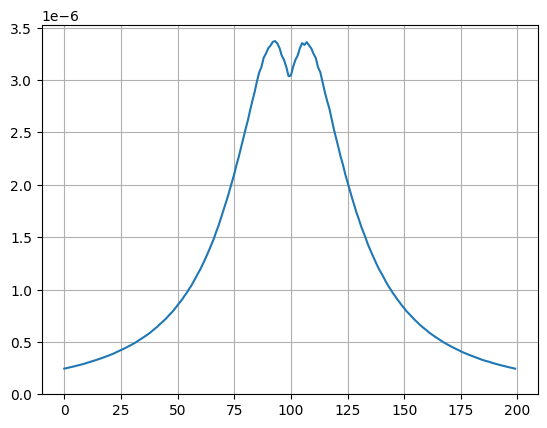

In [49]:
plt.plot(comp1*comp5*comp4)
plt.grid(True)
plt.ylim(bottom=0) 

In [50]:
A0=1000000

angl=0.01499

In [51]:
coef=angl**2/4

In [52]:
A_total=A0/coef

In [53]:
print("{:e}".format(A_total))

1.780151e+10


In [54]:
response=comp1*comp5*comp4*A_total

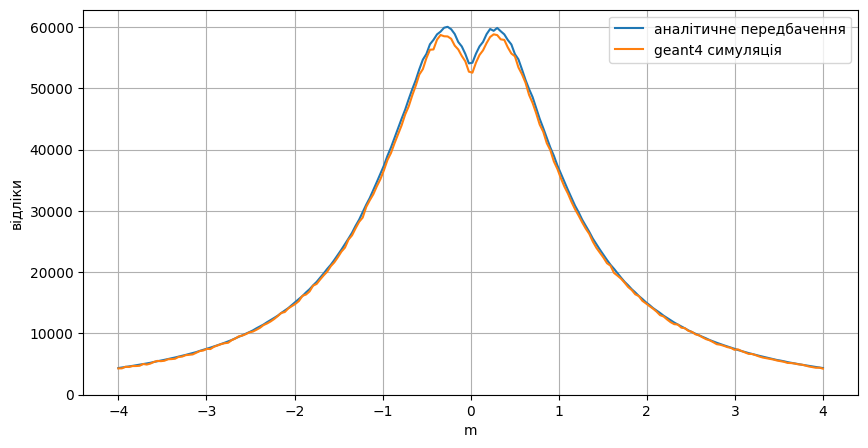

In [67]:
plt.figure(figsize=(10,5))


plt.plot(dist,response,label="аналітичне передбачення")
plt.plot(dist,counts_1,label="geant4 симуляція")
plt.grid(True)
plt.ylabel("відліки")
plt.xlabel("m")
plt.legend()
plt.ylim(bottom=0)
plt.savefig('image.png')

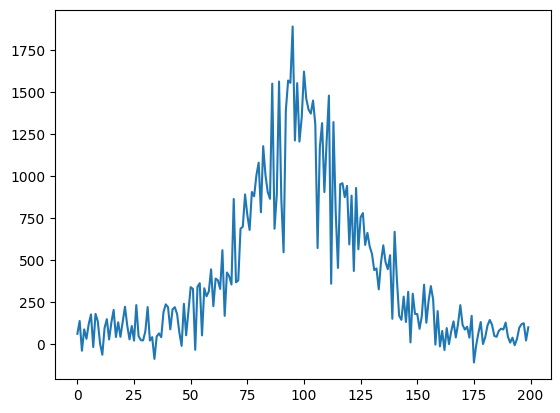

In [56]:
plt.plot(response-counts_1)

In [57]:
len_trj=8
steps=200
speed=0.5

step_len = len_trj/steps

exposure = step_len/speed

In [58]:
activity = A_total/exposure
print("{:e} Bq".format(activity))
print("{:e} Ci".format(activity*2.7e-11))

2.225188e+11 Bq
6.008008e+00 Ci


In [38]:
dump32=[]
for i in dump:
    dump32.append(np.array(i,dtype=np.uint32))

In [39]:



# with open('./run_1.pkl','wb') as f:
#     pickle.dump(dump32,f)

In [40]:
# with open('./run_10k_float.pkl','wb') as f:
#     pickle.dump(dump,f)

(array([8.3000e+01, 8.4000e+01, 5.9000e+01, 7.4000e+01, 6.7000e+01,
       7.7000e+01, 8.6000e+01, 6.1000e+01, 7.9000e+01, 8.8000e+01,
       8.1000e+01, 7.2000e+01, 8.1000e+01, 9.3000e+01, 7.9000e+01,
       8.3000e+01, 7.8000e+01, 7.7000e+01, 8.5000e+01, 7.7000e+01,
       9.4000e+01, 8.0000e+01, 9.6000e+01, 7.8000e+01, 9.2000e+01,
       8.3000e+01, 9.0000e+01, 9.1000e+01, 8.4000e+01, 7.4000e+01,
       9.6000e+01, 8.8000e+01, 8.4000e+01, 1.0200e+02, 8.7000e+01,
       8.9000e+01, 7.4000e+01, 1.0900e+02, 9.5000e+01, 9.1000e+01,
       8.8000e+01, 7.6000e+01, 1.1300e+02, 9.1000e+01, 9.2000e+01,
       8.1000e+01, 9.0000e+01, 7.8000e+01, 9.6000e+01, 9.1000e+01,
       1.1200e+02, 9.0000e+01, 7.3000e+01, 8.6000e+01, 9.7000e+01,
       7.5000e+01, 1.0100e+02, 9.5000e+01, 9.1000e+01, 8.1000e+01,
       8.5000e+01, 8.5000e+01, 9.3000e+01, 7.7000e+01, 7.5000e+01,
       8.5000e+01, 1.0000e+02, 7.8000e+01, 7.4000e+01, 9.1000e+01,
       8.8000e+01, 1.1200e+02, 8.6000e+01, 8.2000e+01, 8.6000

(1, 5000.0)

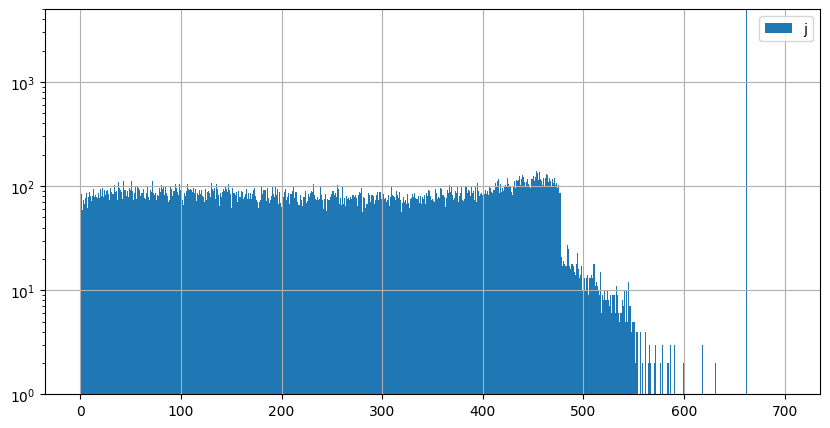

In [41]:
plt.figure(figsize=(10,5))
plt.grid(True)
print(plt.hist(dump[100],bins=np.linspace(0,700,700),label='j'))
plt.legend()

plt.yscale('log')
plt.ylim(1,5.e3)

In [42]:
len(dump[100])

52555